In [1]:
%%capture
import tensorflow as tf
from tensorflow import keras
from scipy.io import loadmat
from tensorflow.keras import regularizers
import os
import time
import numpy as np
import gc
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import Input
import shutil
!pip install tqdm
!pip install h5py
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [2]:
def scale(x):

    return (x - np.mean(x)) / np.std(x)

In [3]:
def preprocess(x):
    
    return x[:,:,:56]

In [4]:
path = "/home/pk2573/Capstone_Data/"

In [5]:
sets = ["Re1243Fr20", "Re309Fr2"]
timesteps = [1,2]
for data in sets:
    for time in timesteps:
        os.chdir(path + data + "/coarse8")
        u = preprocess(scale(loadmat("u_F_xyz_T" + str(time) + ".mat")["u_F"]))
        v = preprocess(scale(loadmat("v_F_xyz_T" + str(time) + ".mat")["v_F"]))
        w = preprocess(scale(loadmat("w_F_xyz_T" + str(time) + ".mat")["w_F"]))
        x = np.array([u, v, w])
        x = np.transpose(x, [1, 2, 3, 0])

        if data == "Re1243Fr20" and time == 1:
            Re1243Fr20_tau12_T1 = preprocess(scale(loadmat("tau12_F_xyz_T" + str(time) + ".mat")["tau12"]))
            Re1243Fr20_tau13_T1 = preprocess(scale(loadmat("tau13_F_xyz_T" + str(time) + ".mat")["tau13"]))
            Re1243Fr20_tau23_T1 = preprocess(scale(loadmat("tau23_F_xyz_T" + str(time) + ".mat")["tau23"]))
            
            Re1243Fr20_heat_1_T1 = preprocess(scale(loadmat("Heat1_F_xyz_T" + str(time) + ".mat")["Heat1"]))
            Re1243Fr20_heat_2_T1 = preprocess(scale(loadmat("Heat2_F_xyz_T" + str(time) + ".mat")["Heat2"]))
            Re1243Fr20_heat_3_T1 = preprocess(scale(loadmat("Heat3_F_xyz_T" + str(time) + ".mat")["Heat3"]))
            Re1243Fr20_x_T1 = np.pad(x, ((3,3), (3,3), (3,3), (0,0)), 'constant', constant_values = 0)
        
        if data == "Re1243Fr20" and time == 2:
            Re1243Fr20_tau12_T2 = preprocess(scale(loadmat("tau12_F_xyz_T" + str(time) + ".mat")["tau12"]))
            Re1243Fr20_tau13_T2 = preprocess(scale(loadmat("tau13_F_xyz_T" + str(time) + ".mat")["tau13"]))
            Re1243Fr20_tau23_T2 = preprocess(scale(loadmat("tau23_F_xyz_T" + str(time) + ".mat")["tau23"]))
            
            Re1243Fr20_heat_1_T2 = preprocess(scale(loadmat("Heat1_F_xyz_T" + str(time) + ".mat")["Heat1"]))
            Re1243Fr20_heat_2_T2 = preprocess(scale(loadmat("Heat2_F_xyz_T" + str(time) + ".mat")["Heat2"]))
            Re1243Fr20_heat_3_T2 = preprocess(scale(loadmat("Heat3_F_xyz_T" + str(time) + ".mat")["Heat3"]))
            Re1243Fr20_x_T2 = np.pad(x, ((3,3), (3,3), (3,3), (0,0)), 'constant', constant_values = 0)
        
        if data == "Re309Fr2" and time == 1:
            Re309Fr2_tau12_T1 = preprocess(scale(loadmat("tau12_F_xyz_T" + str(time) + ".mat")["tau12"]))
            Re309Fr2_tau13_T1 = preprocess(scale(loadmat("tau13_F_xyz_T" + str(time) + ".mat")["tau13"]))
            Re309Fr2_tau23_T1 = preprocess(scale(loadmat("tau23_F_xyz_T" + str(time) + ".mat")["tau23"]))
            
            Re309Fr2_heat_1_T1 = preprocess(scale(loadmat("Heat1_F_xyz_T" + str(time) + ".mat")["Heat1"]))
            Re309Fr2_heat_2_T1 = preprocess(scale(loadmat("Heat2_F_xyz_T" + str(time) + ".mat")["Heat2"]))
            Re309Fr2_heat_3_T1 = preprocess(scale(loadmat("Heat3_F_xyz_T" + str(time) + ".mat")["Heat3"]))
            Re309Fr2_x_T1 = np.pad(x, ((3,3), (3,3), (3,3), (0,0)), 'constant', constant_values = 0)
        
        if data == "Re309Fr2" and time == 2:
            Re309Fr2_tau12_T2 = preprocess(scale(loadmat("tau12_F_xyz_T" + str(time) + ".mat")["tau12"]))
            Re309Fr2_tau13_T2 = preprocess(scale(loadmat("tau13_F_xyz_T" + str(time) + ".mat")["tau13"]))
            Re309Fr2_tau23_T2 = preprocess(scale(loadmat("tau23_F_xyz_T" + str(time) + ".mat")["tau23"]))
            
            Re309Fr2_heat_1_T2 = preprocess(scale(loadmat("Heat1_F_xyz_T" + str(time) + ".mat")["Heat1"]))
            Re309Fr2_heat_2_T2 = preprocess(scale(loadmat("Heat2_F_xyz_T" + str(time) + ".mat")["Heat2"]))
            Re309Fr2_heat_3_T2 = preprocess(scale(loadmat("Heat3_F_xyz_T" + str(time) + ".mat")["Heat3"]))
            Re309Fr2_x_T2 = np.pad(x, ((3,3), (3,3), (3,3), (0,0)), 'constant', constant_values = 0)

### 1. Generate Input Dataset

In [6]:
path = "/home/pk2573/"

In [7]:
print("Input Shapes")
print(Re309Fr2_x_T2.shape)
print(Re309Fr2_x_T1.shape)
print(Re1243Fr20_x_T2.shape)
print(Re1243Fr20_x_T1.shape)
print("\nOutput Shapes")
print(Re309Fr2_tau12_T2.shape)
print(Re309Fr2_tau12_T1.shape)
print(Re309Fr2_heat_1_T2.shape)
print(Re309Fr2_heat_1_T1.shape)
print(Re309Fr2_tau13_T2.shape)
print(Re309Fr2_tau13_T1.shape)
print(Re309Fr2_heat_2_T2.shape)
print(Re309Fr2_heat_2_T1.shape)
print(Re309Fr2_tau23_T2.shape)
print(Re309Fr2_tau23_T1.shape)
print(Re309Fr2_heat_3_T2.shape)
print(Re309Fr2_heat_3_T1.shape)

print(Re1243Fr20_tau12_T2.shape)
print(Re1243Fr20_tau12_T1.shape)
print(Re1243Fr20_heat_1_T2.shape)
print(Re1243Fr20_heat_1_T1.shape)
print(Re1243Fr20_tau13_T2.shape)
print(Re1243Fr20_tau13_T1.shape)
print(Re1243Fr20_heat_2_T2.shape)
print(Re1243Fr20_heat_2_T1.shape)
print(Re1243Fr20_tau23_T2.shape)
print(Re1243Fr20_tau23_T1.shape)
print(Re1243Fr20_heat_3_T2.shape)
print(Re1243Fr20_heat_3_T1.shape)

Input Shapes
(152, 102, 62, 3)
(152, 102, 62, 3)
(152, 102, 62, 3)
(152, 102, 62, 3)

Output Shapes
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)
(146, 96, 56)


In [8]:
if not os.path.exists(path + "/Data"):
    os.mkdir(path + "/Data")
    os.mkdir(path + "/Data/Data")
    os.mkdir(path + "/Data/Labels")
else:
    shutil.rmtree(path + "/Data")
    os.mkdir(path + "/Data")
    os.mkdir(path + "/Data/Data")
    os.mkdir(path + "/Data/Labels")

In [9]:
sample = []
counter = 1
size = 3
y_tau_23 = []
y_tau_12 = []
y_tau_13 = []
y_heat_1 = []
y_heat_2 = []
y_heat_3 = []
num_files = 40

x_range = np.arange(size, Re1243Fr20_x_T1.shape[0] - size)
np.random.shuffle(x_range)
y_range = np.arange(size, Re1243Fr20_x_T1.shape[1] - size)
np.random.shuffle(y_range)
z_range = np.arange(size,Re1243Fr20_x_T1.shape[2] - size)
np.random.shuffle(z_range)

for i in tqdm_notebook(x_range):
    for j in y_range:
        for k in z_range:
            sample.append(Re1243Fr20_x_T1[i - size: i + size + 1, j - size: j + size + 1, k - size: k + size + 1, :])
            sample.append(Re1243Fr20_x_T2[i - size: i + size + 1, j - size: j + size + 1, k - size: k + size + 1, :])
            sample.append(Re309Fr2_x_T1[i - size: i + size + 1, j - size: j + size + 1, k - size: k + size + 1, :])
            sample.append(Re309Fr2_x_T2[i - size: i + size + 1, j - size: j + size + 1, k - size: k + size + 1, :])
            
            y_tau_23.append(Re1243Fr20_tau23_T1[i - size][j - size][k - size])
            y_tau_23.append(Re1243Fr20_tau23_T2[i - size][j - size][k - size])
            y_tau_23.append(Re309Fr2_tau23_T1[i - size][j - size][k - size])
            y_tau_23.append(Re309Fr2_tau23_T2[i - size][j - size][k - size])
            
            y_tau_13.append(Re1243Fr20_tau13_T1[i - size][j - size][k - size])
            y_tau_13.append(Re1243Fr20_tau13_T2[i - size][j - size][k - size])
            y_tau_13.append(Re309Fr2_tau13_T1[i - size][j - size][k - size])
            y_tau_13.append(Re309Fr2_tau13_T2[i - size][j - size][k - size])
            
            y_tau_12.append(Re1243Fr20_tau12_T1[i - size][j - size][k - size])
            y_tau_12.append(Re1243Fr20_tau12_T2[i - size][j - size][k - size])
            y_tau_12.append(Re309Fr2_tau12_T1[i - size][j - size][k - size])
            y_tau_12.append(Re309Fr2_tau12_T2[i - size][j - size][k - size])
            
            y_heat_1.append(Re1243Fr20_heat_1_T1[i - size][j - size][k - size])
            y_heat_1.append(Re1243Fr20_heat_1_T2[i - size][j - size][k - size])
            y_heat_1.append(Re309Fr2_heat_1_T1[i - size][j - size][k - size])
            y_heat_1.append(Re309Fr2_heat_1_T2[i - size][j - size][k - size])
            
            y_heat_2.append(Re1243Fr20_heat_2_T1[i - size][j - size][k - size])
            y_heat_2.append(Re1243Fr20_heat_2_T2[i - size][j - size][k - size])
            y_heat_2.append(Re309Fr2_heat_2_T1[i - size][j - size][k - size])
            y_heat_2.append(Re309Fr2_heat_2_T2[i - size][j - size][k - size])
            
            y_heat_3.append(Re1243Fr20_heat_3_T1[i - size][j - size][k - size])
            y_heat_3.append(Re1243Fr20_heat_3_T2[i - size][j - size][k - size])
            y_heat_3.append(Re309Fr2_heat_3_T1[i - size][j - size][k - size])
            y_heat_3.append(Re309Fr2_heat_3_T2[i - size][j - size][k - size])
            
            if len(sample) == 4* int(((Re1243Fr20_x_T1.shape[0] - size * 2) * (Re1243Fr20_x_T1.shape[1] - size * 2) * (Re1243Fr20_x_T1.shape[2] - size * 2)) / num_files):
                os.chdir(path + "/Data/Data")
                np.save(str(counter), np.array(sample))
                os.chdir(path + "/Data/Labels")
                np.save(str(counter), np.array([y_tau_12, y_tau_13, y_tau_23, y_heat_1, y_heat_2, y_heat_3]))

                del sample
                del y_tau_13
                del y_tau_12
                del y_tau_23
                del y_heat_1
                del y_heat_2
                del y_heat_3
                gc.collect()
                sample = []
                y_tau_23 = []
                y_tau_12 = []
                y_tau_13 = []
                y_heat_1 = []
                y_heat_2 = []
                y_heat_3 = []

                counter += 1
                
del Re309Fr2_x_T2
del Re309Fr2_x_T1
del Re1243Fr20_x_T2
del Re1243Fr20_x_T1
del Re309Fr2_tau12_T2
del Re309Fr2_tau12_T1
del Re309Fr2_tau13_T2
del Re309Fr2_tau13_T1
del Re309Fr2_tau23_T2
del Re309Fr2_tau23_T1
del Re1243Fr20_tau12_T2
del Re1243Fr20_tau12_T1
del Re1243Fr20_tau13_T2
del Re1243Fr20_tau13_T1
del Re1243Fr20_tau23_T2
del Re1243Fr20_tau23_T1
del Re309Fr2_heat_1_T2
del Re309Fr2_heat_1_T1
del Re309Fr2_heat_2_T2
del Re309Fr2_heat_2_T1
del Re309Fr2_heat_3_T2
del Re309Fr2_heat_3_T1
del Re1243Fr20_heat_1_T2
del Re1243Fr20_heat_1_T1
del Re1243Fr20_heat_2_T2
del Re1243Fr20_heat_2_T1
del Re1243Fr20_heat_3_T2
del Re1243Fr20_heat_3_T1
gc.collect()
print("Saved data to disk\n")


Saved data to disk



### 2. Create Model

In [10]:
class DNN(object):
    
    def __init__(self, activation, initializer, regularizer, input_shape):
        self.activation = activation
        self.initializer = initializer
        self.regularizer = regularizer
        self.input_shape = input_shape
        
        pass 
    
    def create_model(self):
        
        data = Input(shape = self.input_shape, name = 'data')
        
        x = tf.keras.layers.Flatten()(data)
        x = tf.keras.layers.Dense(128, 
                                  activation = self.activation,
                                  kernel_regularizer = self.regularizer, 
                                  kernel_initializer = self.initializer)(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.Dense(64, 
                                  activation = self.activation,
                                  kernel_regularizer = self.regularizer, 
                                  kernel_initializer = self.initializer)(x)
        x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.Dense(32, 
                                  activation = self.activation,
                                  kernel_regularizer = self.regularizer, 
                                  kernel_initializer = self.initializer)(x)

        tau_12 = tf.keras.layers.Dense(1, name = "tau_12")(x)
        tau_13 = tf.keras.layers.Dense(1, name = "tau_13")(x)
        tau_23 = tf.keras.layers.Dense(1, name = "tau_23")(x)
        heat_1 = tf.keras.layers.Dense(1, name = "heat_1")(x)
        heat_2 = tf.keras.layers.Dense(1, name = "heat_2")(x)
        heat_3 = tf.keras.layers.Dense(1, name = "heat_3")(x)
        
        model = Model(data, [tau_12, tau_13, tau_23, heat_1, heat_2, heat_3])
                
        return model

### 3. Run Model

Box size used: (7, 7, 7, 3)

Final Dataset Correlation for Tau_12: 0.8183
Final Dataset Correlation for Tau_13: 0.8833
Final Dataset Correlation for Tau_23: 0.8862
Final Dataset Correlation for Heat_1: 0.8163
Final Dataset Correlation for Heat_2: 0.7247
Final Dataset Correlation for Heat_3: 0.8312
Saved model to disk



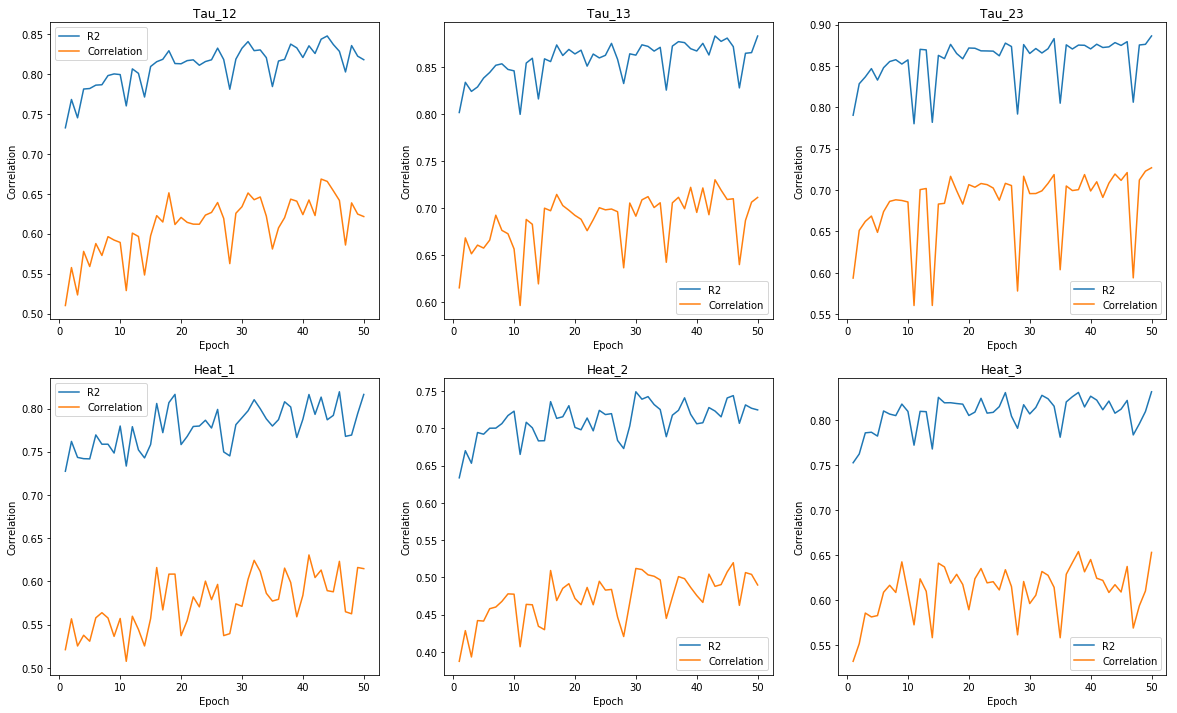

In [11]:
activation = tf.nn.relu
initializer = None
regularizer = None
epochs = 50
batch_size = 1000
val_split = 0.2

print("Box size used: " + str((2 * size + 1, 2 * size + 1, 2 * size + 1, 3)) + "\n")
fig = plt.figure(figsize = (20, 12))
input_shape = (2 * size + 1, 2 * size + 1, 2 * size + 1, 3)
neural_net = DNN(activation, initializer, regularizer, input_shape)
model = neural_net.create_model()
model.compile(optimizer = tf.train.AdamOptimizer(), loss = {"tau_12": "mse", 
                                                                    "tau_13": 'mse', 
                                                                    "tau_23": "mse", 
                                                                    "heat_1": "mse", 
                                                                    "heat_2": "mse",
                                                                    "heat_3": "mse"})

correlation = {"Tau_12":[], "Tau_13": [], "Tau_23": [], "Heat_1": [], "Heat_2": [], "Heat_3": []}
R2 = {"Tau_12":[], "Tau_13": [], "Tau_23": [], "Heat_1": [], "Heat_2": [], "Heat_3": []}
for i in range(epochs):
    files_range = np.arange(1, num_files + 1)
    np.random.shuffle(files_range)
    for j in files_range:
        # Load shard
        x = np.load(path + "/Data/Data/" + str(j) + ".npy")
        y = np.load(path + "/Data/Labels/" + str(j) + ".npy")
        tau_12 = y[0]
        tau_13 = y[1]
        tau_23 = y[2]
        heat_1 = y[3]
        heat_2 = y[4]
        heat_3 = y[5]

        mask =  np.random.rand(x.shape[0]) < 0.80
        x_train, x_test = x[mask,:,:,:,:], x[~mask,:,:,:,:]
        tau_12_train, tau_12_test = tau_12[mask], tau_12[~mask]
        tau_13_train, tau_13_test = tau_13[mask], tau_13[~mask]
        tau_23_train, tau_23_test = tau_23[mask], tau_23[~mask]

        heat_1_train, heat_1_test = heat_1[mask], heat_1[~mask]
        heat_2_train, heat_2_test = heat_2[mask], heat_2[~mask]
        heat_3_train, heat_3_test = heat_3[mask], heat_3[~mask]

        del tau_12
        del tau_13
        del tau_23
        del heat_1
        del heat_2
        del heat_3
        gc.collect()

        y_train = [tau_12_train, tau_13_train, tau_23_train, heat_1_train, heat_2_train, heat_3_train]
        y_test = [tau_12_test, tau_13_test, tau_23_test, heat_1_test, heat_2_test, heat_3_test]

        # Fit on shard
        model.fit(x_train, {"tau_12": y_train[0], 
                                               "tau_13": y_train[1], 
                                               "tau_23": y_train[2],
                                               "heat_1": y_train[3],
                                               "heat_2": y_train[4],
                                               "heat_3": y_train[5]}, 
                                epochs = 1, 
                                batch_size = batch_size, 
                                validation_split = val_split,
                                verbose = 0)
        del x_train
        del y_train
        gc.collect()

        # Generate predictions on shard
        preds = model.predict(x_test)
        temp_1 = {"Tau_12":[], "Tau_13": [], "Tau_23": [], "Heat_1": [], "Heat_2": [], "Heat_3": []}
        temp_2 = {"Tau_12":[], "Tau_13": [], "Tau_23": [], "Heat_1": [], "Heat_2": [], "Heat_3": []}

        for l in range(len(preds)):
            temp_1[list(temp_1.keys())[l]].append(r2_score(y_test[l], preds[l].flatten()))
            temp_2[list(temp_2.keys())[l]].append(np.corrcoef(y_test[l], preds[l].flatten())[0,1])
        del x_test
        del x
        gc.collect()

    #Get average Test corr and R2 for the epoch
    for n in range(len(temp_1)):
        correlation[list(correlation.keys())[n]].append(np.mean(temp_1[list(temp_1.keys())[n]]))
        R2[list(R2.keys())[n]].append(np.mean(temp_2[list(temp_2.keys())[n]]))

# Plot R2 and corr evolution
for k in range(len(temp_1)):
    fig.add_subplot(2, 3, k + 1)
    plt.plot(np.arange(1, epochs + 1), np.array(R2[list(R2.keys())[k]]), label = 'R2')
    plt.plot(np.arange(1, epochs + 1), np.array(correlation[list(correlation.keys())[k]]), label = 'Correlation')
    plt.xlabel('Epoch')
    plt.ylabel("Correlation")
    plt.title(list(correlation.keys())[k])
    plt.legend()

for m in range(len(preds)):
    print("Final Dataset Correlation for " + list(correlation.keys())[m] + ": %.4f" % np.corrcoef(preds[m].flatten(), y_test[m])[0, 1])
del preds
del y_test
del temp_1
del temp_2 
gc.collect()

os.chdir("/home/pk2573/Capstone/dscaptstone-master/Code/DNN/Final Models")
model_name_json = "combined_time_model_tau_heat.json"
model_name_h5 = "combined_time_model_tau_heat.h5"
model_json = model.to_json()
with open(model_name_json, "w") as json_file:
    json_file.write(model_json)
model.save_weights(model_name_h5)
print("Saved model to disk\n")